In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
file_path = 'preprocessed_scorecard_data.csv'
dataset = pd.read_csv(file_path, low_memory=False)

In [11]:
from sklearn.impute import SimpleImputer
# Ensure all columns are numeric
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset = dataset[numeric_cols]

# Impute any remaining missing values
imputer = SimpleImputer(strategy='median')
dataset[numeric_cols] = imputer.fit_transform(dataset[numeric_cols])

# Define features and target variable
X = dataset.drop(columns=['RPY_3YR_RT_SUPP', 'repayment_rate_high'])
y = dataset['repayment_rate_high'].astype(int)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the top N important features
def plot_top_features(importances, feature_names, top_n=10, model_name='Model'):
    # Create a DataFrame for easy sorting and plotting
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort the DataFrame by importance and get the top N features
    top_features = feature_importances.sort_values(by='Importance', ascending=False).head(top_n)
    
    # Plot the top N features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title(f'Top {top_n} Most Important Features - {model_name}')
    plt.show()


In [12]:
# Initialize RandomForest and GradientBoosting models
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [15]:
# Fit the models to get feature importances
rf.fit(X, y)
gb.fit(X, y)

GradientBoostingClassifier()

In [16]:
# Feature importances
rf_importances = rf.feature_importances_
gb_importances = gb.feature_importances_

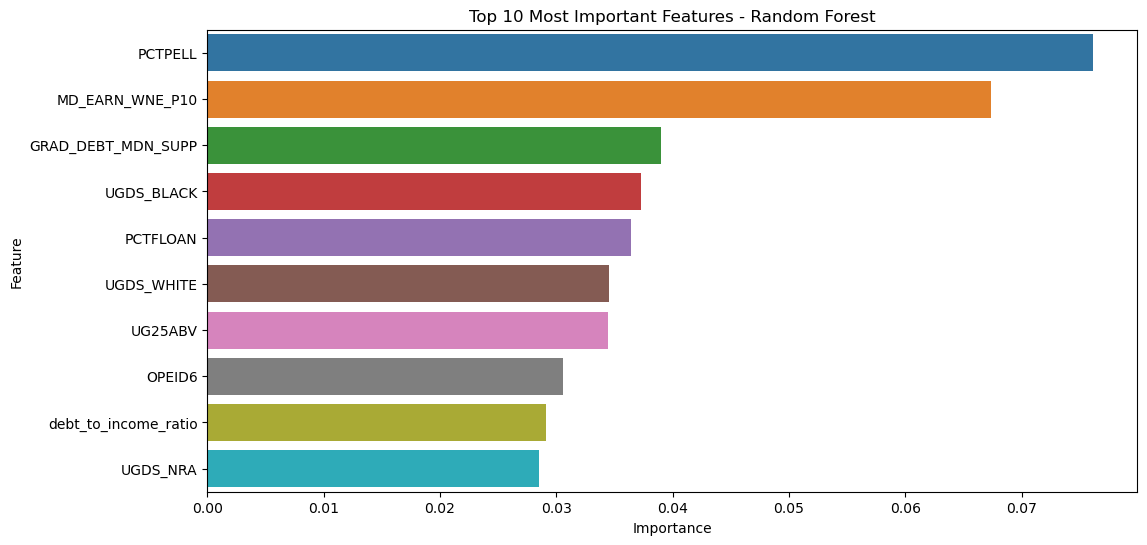

In [26]:
# Plot top 10 features for RandomForest
plot_top_features(rf_importances, X.columns, top_n=10, model_name='Random Forest')

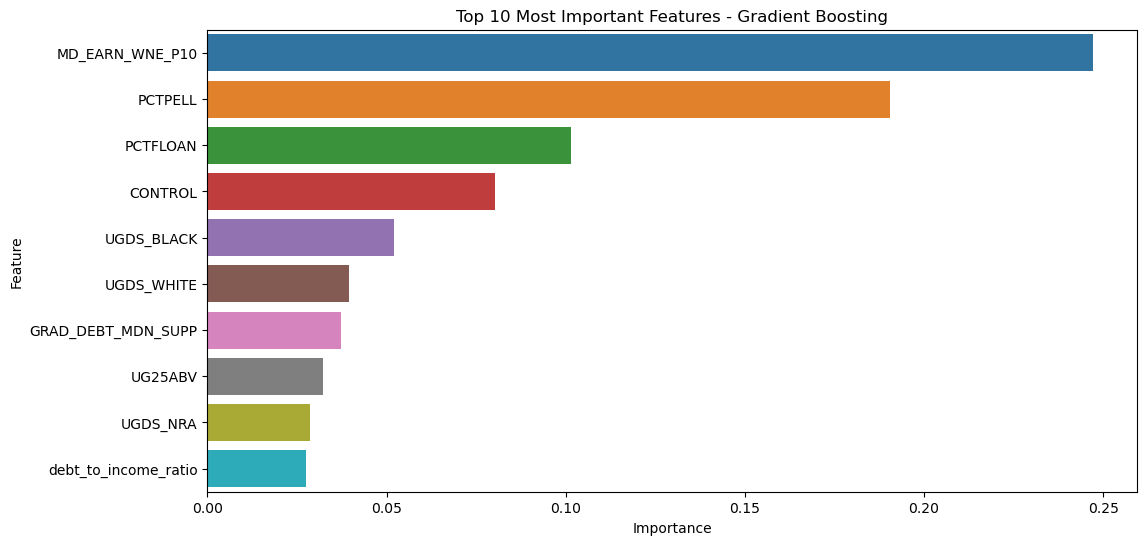

In [27]:
# Plot top 10 features for GradientBoosting
plot_top_features(gb_importances, X.columns, top_n=10, model_name='Gradient Boosting')